## 공개되어 있는 데이터를 가지고 로지스틱 회귀 진행
* Fashion-MNIST 데이터셋을 활용하여 로지스틱 회귀 모델을 구현
* 각 이미지 크기를 28 X 28 / 흑백이미지 / 총 10개의 클래스

In [1]:
"""
Fashion-MNIST 라벨 구성 요소
0 - 티셔츠 
1 - 바지
2 - 스웨터 
3 - 드레스 
4 - 코트 
5 - 샌들 
6 - 셔츠 
7 - 운동화 
8 - 가방
9 - 앵글 부츠 
"""

'\nFashion-MNIST 라벨 구성 요소\n0 - 티셔츠 \n1 - 바지\n2 - 스웨터 \n3 - 드레스 \n4 - 코트 \n5 - 샌들 \n6 - 셔츠 \n7 - 운동화 \n8 - 가방\n9 - 앵글 부츠 \n'

In [2]:
import torch 
import torch.nn as nn 
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### 데이터셋 다운로드 및 DataLoader 생성

In [4]:
train_dataset = dsets.FashionMNIST(root ='./data',
                                  train = True, 
                                  transform = transforms.ToTensor(),
                                  download=True)

test_dataset = dsets.FashionMNIST(root='./data',
                                 train=False,
                                 transform = transforms.ToTensor(),
                                 download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



### train Loader, test Loader 생성

In [5]:
batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

## 모델 정의

In [6]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [7]:
# 하이퍼파라미터 설정
input_size = 28 * 28 # 이미지 크기의 값
num_classes = 10
num_epochs = 10
learning_rate = 0.001

total_step = len(train_loader)

### 모델, 손실함수, 옵티마이저 정의

In [8]:
model = LogisticRegression(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [9]:
#setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: ', device)
model.to(device)

Using device:  cpu


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

### 모델 학습

Epoch [1/10], Step [100/600], Loss: 2.1476, Train Acc: 0.2700
Epoch [1/10], Step [200/600], Loss: 1.9773, Train Acc: 0.4000
Epoch [1/10], Step [300/600], Loss: 1.8062, Train Acc: 0.4700
Epoch [1/10], Step [400/600], Loss: 1.7501, Train Acc: 0.4850
Epoch [1/10], Step [500/600], Loss: 1.6422, Train Acc: 0.5120
Epoch [1/10], Step [600/600], Loss: 1.5918, Train Acc: 0.5233
Epoch [2/10], Step [100/600], Loss: 1.5198, Train Acc: 0.6300
Epoch [2/10], Step [200/600], Loss: 1.4104, Train Acc: 0.6450
Epoch [2/10], Step [300/600], Loss: 1.3118, Train Acc: 0.6700
Epoch [2/10], Step [400/600], Loss: 1.4448, Train Acc: 0.6500
Epoch [2/10], Step [500/600], Loss: 1.3387, Train Acc: 0.6460
Epoch [2/10], Step [600/600], Loss: 1.2628, Train Acc: 0.6500
Epoch [3/10], Step [100/600], Loss: 1.1225, Train Acc: 0.6800
Epoch [3/10], Step [200/600], Loss: 1.2268, Train Acc: 0.6850
Epoch [3/10], Step [300/600], Loss: 1.2698, Train Acc: 0.6533
Epoch [3/10], Step [400/600], Loss: 1.2162, Train Acc: 0.6375
Epoch [3

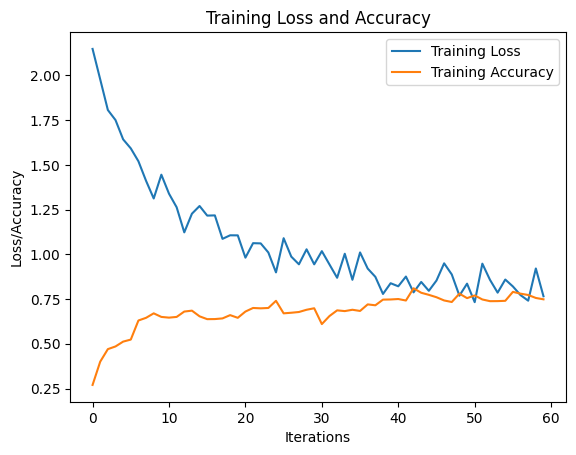

In [10]:
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    correct = 0 
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        
        # 데이터 로드 
        images = images.reshape(-1, input_size).to(device)
        labels =labels.to(device)

        # 순전파 및 Loss 계산
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 역전파 및 가중치 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 로그 출력
        if (i+1) % 100 == 0 :
            loss_list.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)
            print("Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Train Acc: {:.4f}".format(epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))

            
# 손실 및 정확도 그래프 출력
plt.plot(loss_list, label = 'Training Loss')
plt.plot(acc_list, label='Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Loss/Accuracy')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.show()

### 테스트 시각화

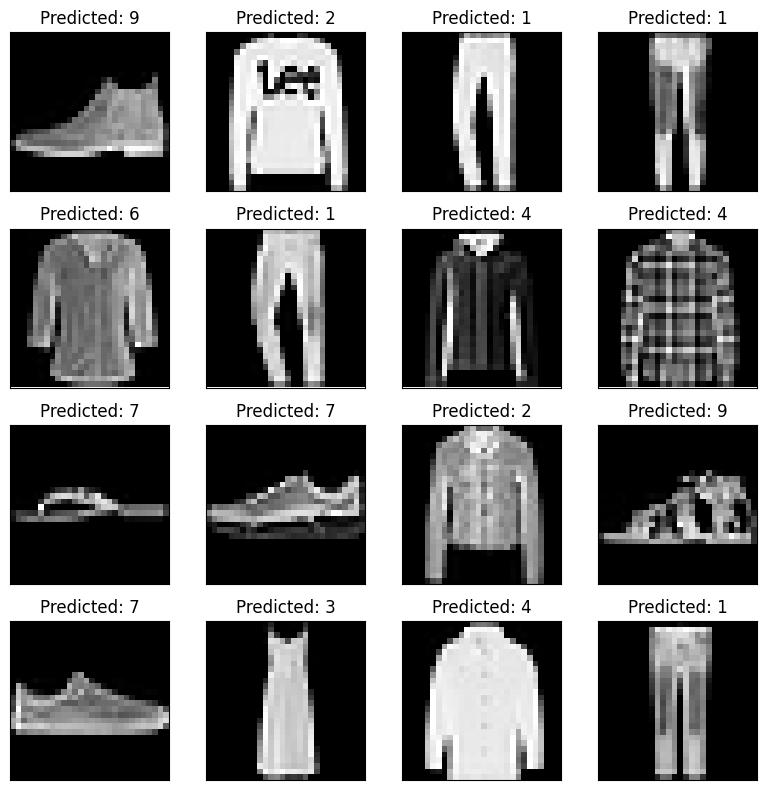

In [15]:
import numpy as np

# 테스트 이미지 가져오기 
dataiter = iter(test_loader)
images, labels = dataiter.__next__()
images = images.reshape(-1, 28*28)

# 모델 예측
model.eval() # 모델을 평가 모드로 변경
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)
# print(predicted)

# 이미지와 예측값 시각화 
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(images[i].reshape(28, 28)), cmap='gray')
    ax.set_title(f"Predicted: {predicted[i].item()}")
plt.tight_layout()
plt.show()